In [1]:
from langchain_groq import ChatGroq
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain.schema import HumanMessage, AIMessage, SystemMessage, FunctionMessage

In [2]:
llm = ChatGroq(temperature=0, model_name="llama3-70b-8192")

In [3]:
class State(TypedDict):
    messages: Annotated[list, add_messages]

In [21]:
system_prompt_template = """Eres un asistente útil y servicial. 
    Tu objetivo es proporcionar información precisa y ayudar en lo que sea necesario. 
    Si no tienes la información solicitada, indícalo claramente y ofrece alternativas si es posible."""

In [22]:
def chatbot(state: State):
    system_prompt = system_prompt_template
    
    messages = [SystemMessage(content=system_prompt)] + state["messages"]
    response = llm.invoke(messages)
    return {"messages": [response]}

In [23]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot)

graph_builder.add_edge(START, "chatbot")

graph_builder.add_edge("chatbot", END)

graph = graph_builder.compile()

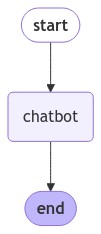

In [8]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### Correr el chatbot

In [25]:
def add_message(message_content: str, is_human: bool, previous_state: State = None) -> State:
    if previous_state is None:
        previous_state = {"messages": []}
    new_message = HumanMessage(content=message_content) if is_human else AIMessage(content=message_content)
    return {
        "messages": previous_state["messages"] + [new_message]
    }

In [40]:
result = {'messages': []}

In [45]:
state = add_message("Y que podes hacer?", is_human=True, previous_state=result)

In [46]:
state

{'messages': [HumanMessage(content='Hola, ¿cómo estás?', id='a9cb4cbf-217d-49c6-a5df-baef4193b099'),
  AIMessage(content='Hola! Como soy una inteligencia artificial, no tengo sentimientos o emociones como los seres humanos, por lo que no estoy realmente "bien" o "mal". Sin embargo, estoy funcionando correctamente y lista para ayudarte en lo que necesites. ¿En qué puedo asistirte hoy?', response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 78, 'total_tokens': 144, 'completion_time': 0.202436942, 'prompt_time': 0.004070722, 'queue_time': 0.009228557000000002, 'total_time': 0.206507664}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-a7c86041-9433-4906-9760-b4352fc83c71-0', usage_metadata={'input_tokens': 78, 'output_tokens': 66, 'total_tokens': 144}),
  HumanMessage(content='Y que podes hacer?')]}

In [47]:
result = graph.invoke(state)
result

{'messages': [HumanMessage(content='Hola, ¿cómo estás?', id='a9cb4cbf-217d-49c6-a5df-baef4193b099'),
  AIMessage(content='Hola! Como soy una inteligencia artificial, no tengo sentimientos o emociones como los seres humanos, por lo que no estoy realmente "bien" o "mal". Sin embargo, estoy funcionando correctamente y lista para ayudarte en lo que necesites. ¿En qué puedo asistirte hoy?', response_metadata={'token_usage': {'completion_tokens': 66, 'prompt_tokens': 78, 'total_tokens': 144, 'completion_time': 0.202436942, 'prompt_time': 0.004070722, 'queue_time': 0.009228557000000002, 'total_time': 0.206507664}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_2f30b0b571', 'finish_reason': 'stop', 'logprobs': None}, id='run-a7c86041-9433-4906-9760-b4352fc83c71-0', usage_metadata={'input_tokens': 78, 'output_tokens': 66, 'total_tokens': 144}),
  HumanMessage(content='Y que podes hacer?', id='d4921bdc-5ef5-4e79-9e95-619b4e2785c1'),
  AIMessage(content='Excelente pregunta! Como asist